# Week 6, Class 2: Customizing Matplotlib Plots

## 1. The Object-Oriented Approach: figure and axes
While the simple `plt.plot()` style is great for quick plots, a more powerful and flexible approach is to use the object-oriented (OO) interface. This involves creating a `figure` object (the canvas) and one or more `axes` objects (the individual plots) and then calling methods directly on these objects.

### 1.1. Creating Subplots with plt.subplots()
The `plt.subplots()` function is the primary way to create a figure with multiple plots. It returns two objects:
* `fig`: The entire figure, or canvas, that holds all the subplots.
* `ax`: A single axis object or an array of axis objects, which represent the individual plots.

You call plotting methods (like `.plot()`) directly on these `ax` objects instead of using `plt`. This is a best practice for creating professional-quality plots.

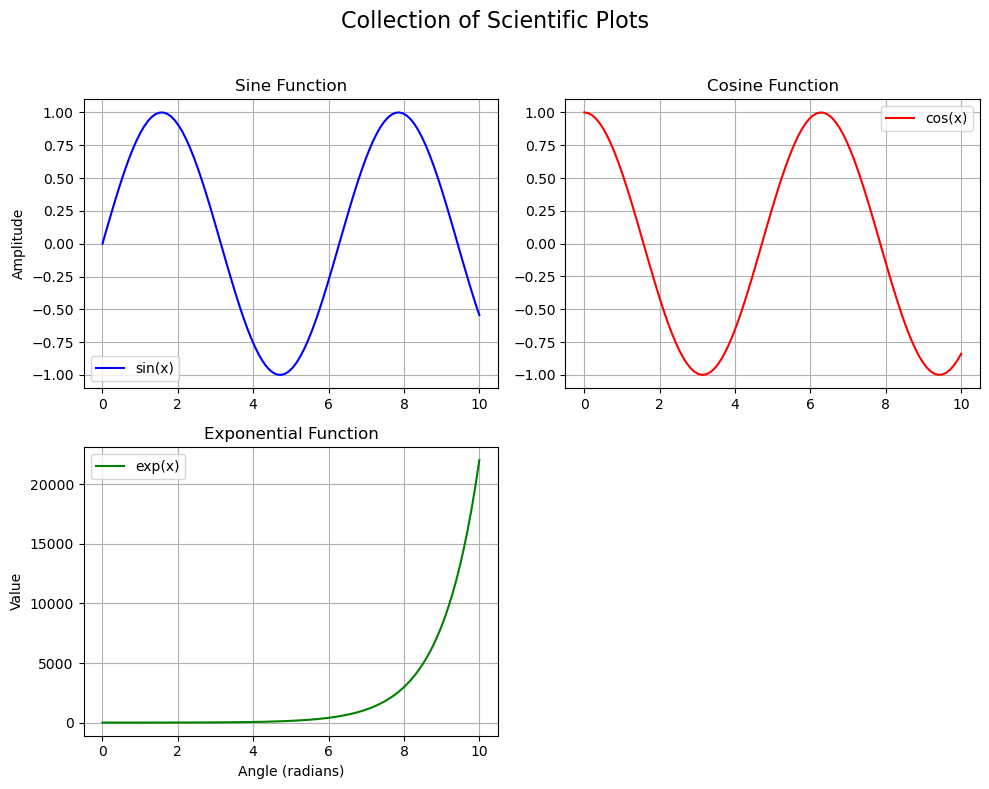

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create some dummy data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(x)

# Create a figure with 2 rows and 2 columns of subplots
# figsize controls the size of the entire figure in inches
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# `ax` is now a 2D NumPy array of axes objects, so we can index it like a matrix
# Plot on the top-left subplot (ax[0, 0])
ax[0, 0].plot(x, y1, color='blue', label='sin(x)')
ax[0, 0].set_title('Sine Function')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot on the top-right subplot (ax[0, 1])
ax[0, 1].plot(x, y2, color='red', label='cos(x)')
ax[0, 1].set_title('Cosine Function')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot on the bottom-left subplot (ax[1, 0])
ax[1, 0].plot(x, y3, color='green', label='exp(x)')
ax[1, 0].set_title('Exponential Function')
ax[1, 0].set_xlabel('Angle (radians)')
ax[1, 0].set_ylabel('Value')
ax[1, 0].legend()
ax[1, 0].grid(True)

# We can leave a subplot empty
ax[1, 1].set_visible(False) # Hide the fourth subplot

# Set a title for the entire figure
fig.suptitle('Collection of Scientific Plots', fontsize=16)

# Adjust the spacing between subplots to prevent labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96]) # rect parameter leaves space for the suptitle

# Display the plot
plt.show()

## 2. Fine-Tuning Plot Appearance
You have extensive control over the visual style of your plots.

### 2.1. Line, Marker, and Color Customization
You can customize lines and markers directly in the plotting method call.

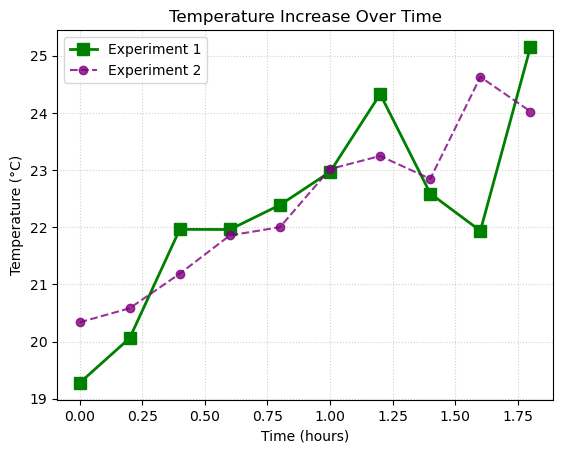

In [2]:
# Create dummy data for demonstration
time = np.arange(0, 2, 0.2)
temp_exp1 = 20 + time * 3 + np.random.randn(len(time))
temp_exp2 = 20 + time * 2.5 + np.random.randn(len(time)) * 0.5

plt.plot(time, temp_exp1, 
         color='green',         
         linestyle='-',         
         linewidth=2,           # Line width
         marker='s',            # Square markers (also 'o', '^', 'x', etc.)
         markersize=8,          # Marker size
         label='Experiment 1')

plt.plot(time, temp_exp2, 
         color='purple',      # Find tables for color codes!
         linestyle='--',        
         linewidth=1.5,
         marker='o',            
         markersize=6,
         alpha=0.8,             # Transparency (0.0 = transparent, 1.0 = opaque)
         label='Experiment 2')

plt.title("Temperature Increase Over Time")
plt.xlabel("Time (hours)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6) # Customize grid line style and transparency

plt.show()

## 3. Configuring Axes, Ticks, and Limits
Beyond simple labels, you can manually set the range of your axes and control the tick marks.

### 3.1. Setting Axis Limits
`plt.xlim()` and `plt.ylim()` (or `ax.set_xlim()` and `ax.set_ylim()`) allow you to focus on a specific region of your data. This is crucial for handling outliers or comparing different plots on the same scale.

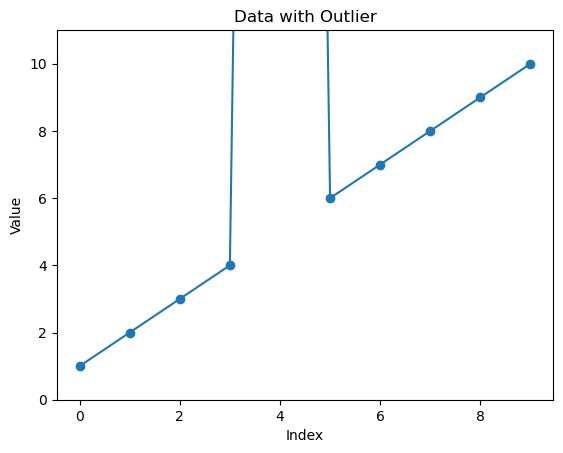

In [6]:
# Create dummy data with a few outliers
x = np.arange(10)
y = np.array([1, 2, 3, 4, 105, 6, 7, 8, 9, 10])

plt.plot(x, y, marker='o')
plt.title("Data with Outlier")
plt.xlabel("Index")
plt.ylabel("Value")

# Focus on the majority of the data by setting custom y-limits
plt.ylim(0, 11)

plt.show()

### 3.2. Customizing Ticks and Tick Labels
You can explicitly set the position of ticks on an axis and even change their labels.

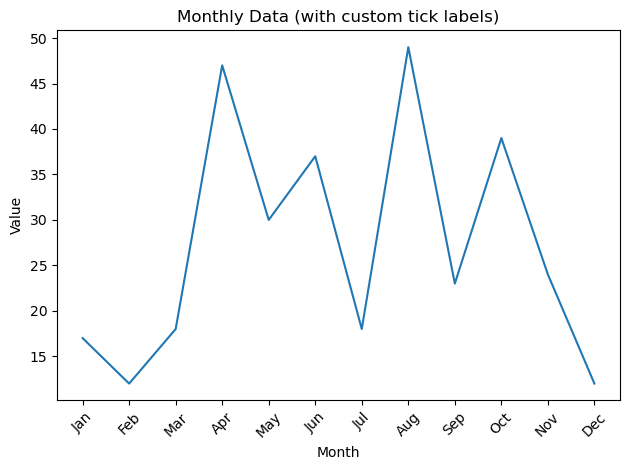

In [7]:
# Create dummy data
months = np.arange(1, 13)
data_points = np.random.randint(10, 50, size=12)

# Define custom month names for tick labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, data_points)

# Set the x-ticks to be at every month
plt.xticks(months, month_names, rotation=45) # rotation=45 prevents labels from overlapping
plt.title("Monthly Data (with custom tick labels)")
plt.xlabel("Month")
plt.ylabel("Value")

plt.tight_layout() # Ensures tick labels don't get cut off
plt.show()

## 4. Saving Plots with High Resolution
When saving plots for a publication or presentation, you often need higher resolution. The `dpi` (dots per inch) parameter in `plt.savefig()` controls the resolution.

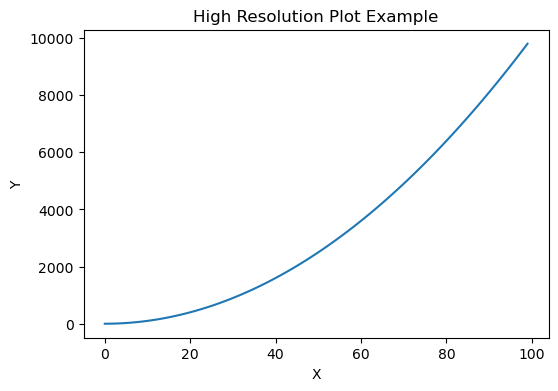

Plot saved as 'high_res_plot.png' with 300 DPI.


In [8]:
# Create a simple plot
x = np.arange(100)
y = x**2

plt.figure(figsize=(6, 4)) # Specify a figure size
plt.plot(x, y)
plt.title("High Resolution Plot Example")
plt.xlabel("X")
plt.ylabel("Y")

# Save the plot with a high DPI
plt.savefig('high_res_plot.png', dpi=300)

plt.show()
print("Plot saved as 'high_res_plot.png' with 300 DPI.")

## Summary and Key Takeaways
* Subplots (`plt.subplots()`) are essential for creating multiple plots on a single figure for easy comparison.
* You can extensively customize plot elements like colors (`color`), line styles (`linestyle`), markers (`marker`), and width (`linewidth`).
* Control your plot's view with axis limits (`plt.xlim()`, `plt.ylim()`) and custom tick labels (`plt.xticks()`).
* Saving plots with a higher `dpi` (e.g., 300) is important for high-quality output.

## Exercises
Complete the following exercises in a new Python script or a new Jupyter Notebook.

1. **Plotting Two Datasets on Separate Subplots:**
* Create two sets of data:
    * `time = np.arange(0, 10, 0.1)`
    * `decay = np.exp(-0.5 * time)`
    * `growth = 1 - np.exp(-0.2 * time)`
* Create a figure with two subplots stacked vertically (2 rows, 1 column).
* In the top subplot, plot the `decay` data. Give it a title "Exponential Decay".
* In the bottom subplot, plot the `growth` data. Give it a title "Exponential Growth".
* Label the x and y axes on both plots, and use `plt.tight_layout()` to make sure they are well-spaced.
* Save the figure as `decay_growth_subplots.png`.

2. **Customizing a Scatter Plot:**

* Create two NumPy arrays representing `x` and `y` data, each with 20 random values between 0 and 50.
* Create a scatter plot of `y` versus `x`.
* Use a `marker` of your choice (e.g., `'^'`, `'s'`).
* Set the `color` of the markers to `'magenta'`.
* Make the markers semi-transparent with `alpha=0.5`.
* Add a descriptive title and axis labels.
* Add an annotation to the data point with the highest `y` value, highlighting it as "Max Value".

3. **Advanced Bar Chart with Custom Ticks:**

* Create a list of categorical labels: `lab_teams = ['Alpha', 'Beta', 'Gamma', 'Delta']`.
* Create a corresponding list of `average_scores = [85, 92, 78, 88]`.
* Create a bar chart.
* The x-axis labels should be the `lab_teams`.
* Change the color of the bar for the highest score to `'gold'` and all others to a different color (e.g., `'lightblue'`).
* Add a title and axis labels.
* Save the plot as `lab_scores.png` with a resolution of 200 `dpi`.